# Architectural Tradeoff Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from paretoset import paretoset
import plotly.express as px
from adjustText import adjust_text
from pcatools import *
from tabulate import tabulate
import os
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [15]:
path = "C:/Users/KOQVIST1/architectural-tradeoff-analysis/Simulation data/"
filedir = "April11_ver2/combined.csv"
df = pd.DataFrame(pd.read_csv((path+filedir)))

full_length = len(df)

# Clean data by dropping inf values (and NaN)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df = df.drop_duplicates()

cleaned_length = len(df)

number_of_topologies = len([x for x in df.columns if x[0].isdigit()])

## Data Display

Data statistics: April11_ver2/combined.csv
Original size: 21000 rows 
Cleaned size: 17781 rows 
Dulicated: 3219 rows 
Filtered size: 9565 rows 
Dimension: 31 columns 
Topologies count: 7
Topologies: 1.1, 1.2, 1.3, 1.4, 2.1, 2.2, 3.0


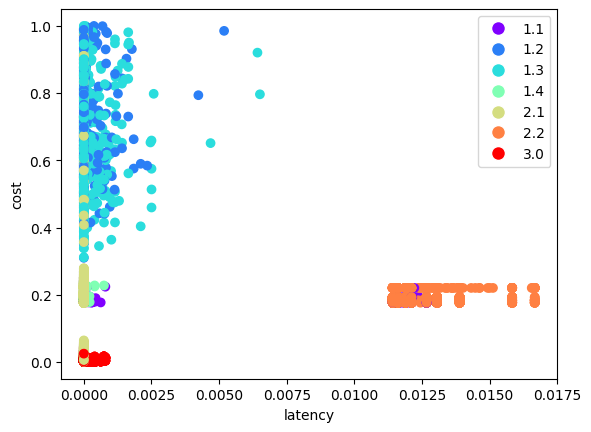

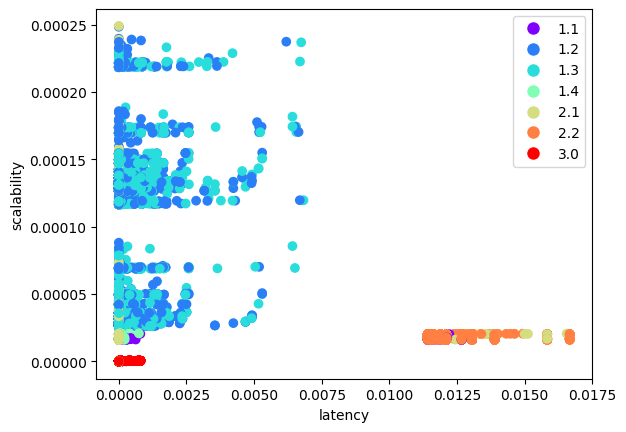

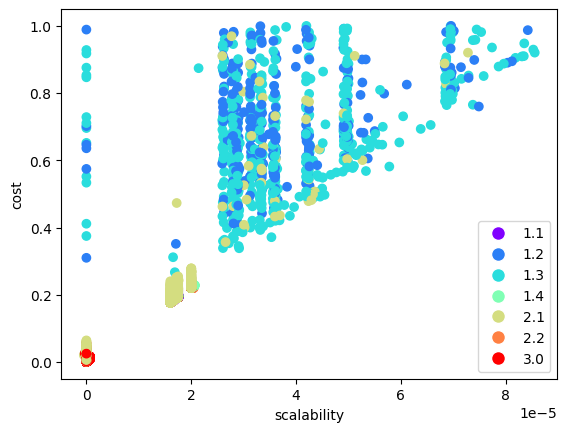

In [16]:
cost_uplim = 1;
cost_lowlim = None;
latency_uplim = 0.02;
latency_lowlim = None;
scalability_uplim = 10;
scalability_lowlim = -10;

df_filtered = df.copy()

if cost_uplim != None:
    df_filtered = df_filtered.loc[df_filtered['cost'] < cost_uplim]
if cost_lowlim != None:
    df_filtered = df_filtered.loc[df_filtered['cost'] > cost_lowlim]
if latency_uplim != None:
    df_filtered = df_filtered.loc[df_filtered['latency'] < latency_uplim]
if latency_lowlim != None:    
    df_filtered = df_filtered.loc[df_filtered['latency'] > latency_lowlim]
if scalability_uplim != None:
    df_filtered = df_filtered.loc[df_filtered['latency'] < scalability_uplim]
if scalability_lowlim != None:    
    df_filtered = df_filtered.loc[df_filtered['latency'] > scalability_lowlim]

filtered_length = len(df_filtered)

print("Data statistics: " + filedir + "\n" 
    + "Original size: " + str(full_length) + " rows \n" 
    + "Cleaned size: " + str(cleaned_length) + " rows \n"
    + "Dulicated: " + str(full_length - cleaned_length) + " rows \n"
    + "Filtered size: " + str(filtered_length) + " rows \n"
    + "Dimension: " + str(len(df.columns)) + " columns \n"
    + "Topologies count: " + str(number_of_topologies) + "\n"
    + "Topologies: " + ', '.join([str(topo) for topo in df.columns[0:number_of_topologies]]))

topoScatterPrint(df, 'latency','cost', latency_uplim, latency_lowlim, cost_uplim, cost_lowlim, False)
topoScatterPrint(df, 'latency','scalability', latency_uplim, latency_lowlim, scalability_uplim, scalability_lowlim, False)
topoScatterPrint(df, 'scalability','cost', scalability_uplim, scalability_lowlim, cost_uplim, cost_lowlim, False)



# Pareto Front Optimisation

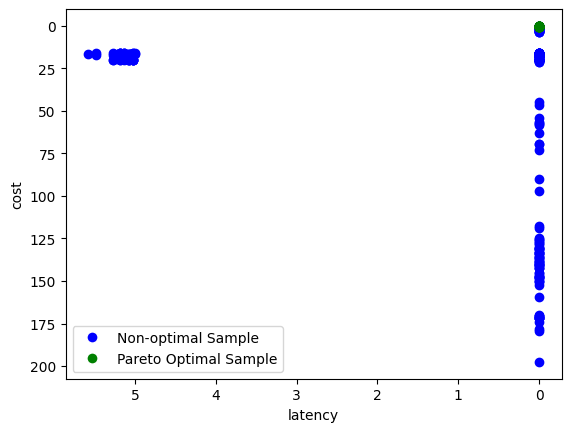

In [11]:
pareto_targets = ['latency', 'cost']
pareto_objectives = ["min", "min"]
df_pareto = paretoOptimize(df_filtered,pareto_targets, pareto_objectives, iterations = 10)
printPareto(df_filtered,df_pareto, pareto_targets, True)

# PCA Analysis

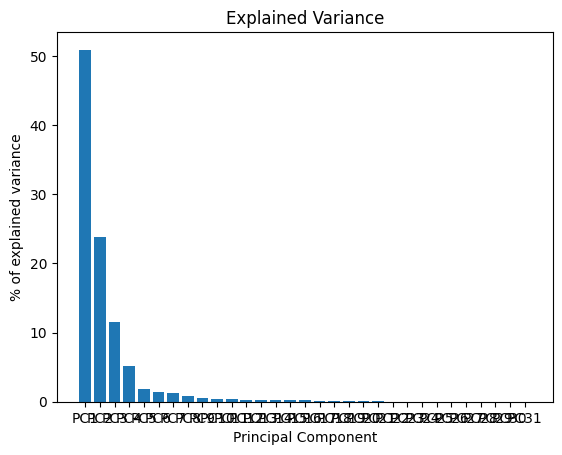

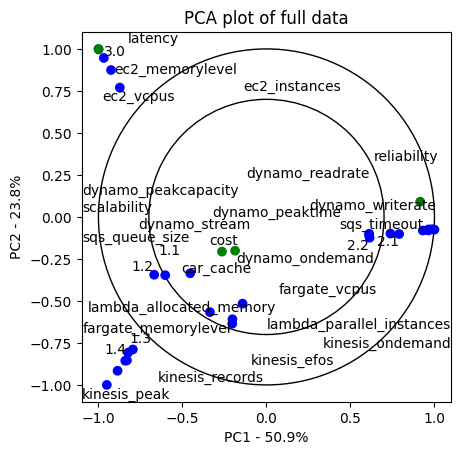

In [12]:
# Same for full matrix (without pareto)
corr_full = df.corr()
corr_full = corr_full.fillna(0)

# assign categories
buckets = [0] * len(df.columns);
buckets[-4:] = [1, 1, 1, 1];
categories = np.array(buckets)
 
# use colormap
colormap = np.array(['b', 'g'])
pca, pca_data = createPCA(corr_full)
printScree(pca, 'Explained Variance')
printPCA(pca, pca_data, corr_full, 'PCA plot of full data',categories=categories, colormap=colormap)

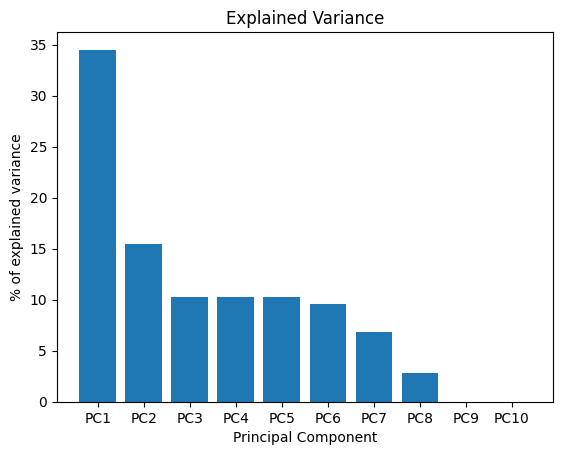

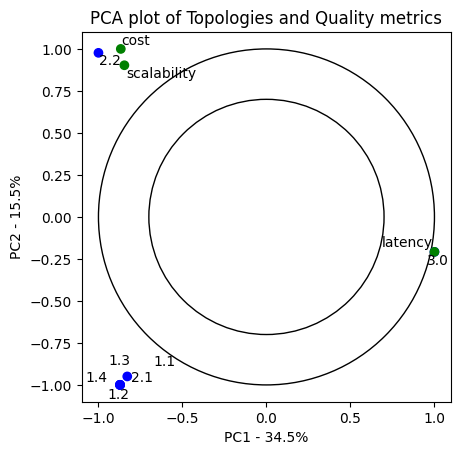

In [13]:
desired_cols = ['1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '3.0', 'cost','latency','scalability']
df_topo = df[desired_cols]

corr_topo = scaleData(df_topo).corr()
corr_topo = corr_topo.fillna(0)

# assign categories
buckets = [0] * len(df_topo.columns);
buckets[-3:] = [1, 1, 1];
categories = np.array(buckets)

pca, pca_data = createPCA(corr_topo)
printScree(pca, 'Explained Variance')
printPCA(pca, pca_data, corr_topo, 'PCA plot of Topologies and Quality metrics',categories=categories, colormap=colormap)